# Statistical Thinking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

In [2]:
salary = pd.read_csv('salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [4]:
for i in list(salary.columns):
    print(f'{i}: {salary[i].isnull().unique()}')

salary: [False  True]
exprior: [False]
yearsworked: [False]
yearsrank: [False]
market: [False]
degree: [False]
otherqual: [False]
position: [False]
male: [False]
Field: [False]
yearsabs: [False]


There are 514 responders with 1 missing value.

In [5]:
sala = salary.dropna()

In [6]:
print(f'The highest salary in the group is R{sala["salary"].max()} and the lowest salary in the group R{sala["salary"].min()}')

The highest salary in the group is R96156.0 and the lowest salary in the group R29000.0


In [7]:
print(f'Mean salary for the sample: {np.mean(salary["salary"])} and the standard error of the mean: {stats.sem(sala["salary"])}')

Mean salary for the sample: 50863.22009783625 and the standard error of the mean: 560.0622753925232


In [8]:
print(f'The standard deviation for years worked is: {np.std(sala["yearsworked"])}')

The standard deviation for years worked is: 9.437828327328843


In [9]:
print(f'The median salary of the sample is: {np.median(salary["salary"].dropna())}')

The median salary of the sample is: 50096.0


In [10]:
print(f'The interquartile range for salary in the sample is: {np.percentile(salary["salary"].dropna(),75) - np.percentile(salary["salary"].dropna(),25)}')

The interquartile range for salary in the sample is: 20345.0


In [11]:
gender = salary.groupby('male').count().iloc[:,0]
gender

male
0    128
1    385
Name: salary, dtype: int64

In [12]:
gender = pd.DataFrame(gender).rename(columns={'salary':'Count'}, index={0:'Female', 1: 'Male'})
del gender.index.name
gender.transpose()

,Female,Male
Count,128,385


In [13]:
exec_women = salary[(salary['male'] == 0) & (salary['position'] == 3)].count().max()
exec_men = salary[(salary['male'] == 1) & (salary['position'] == 3)].count().max()
print(f'There are {exec_women} women who are executives compared to {exec_men} men who are executives')

There are 19 women who are executives compared to 192 men who are executives


In [14]:
sns.set()

C:\Users\Aspire\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aspire\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


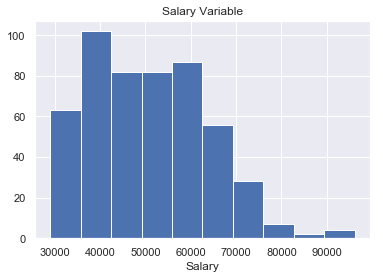

In [15]:
plt.hist(salary['salary'])
plt.title('Salary Variable')
plt.xlabel('Salary')
plt.show()

The distribution is skewed to the right.

Text(0.5, 1.0, 'Average salaries of men and women')

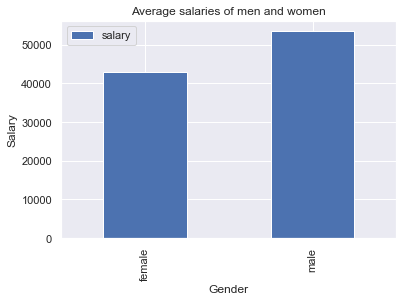

In [16]:
avg_salaries = pd.pivot_table(salary, index='male', values='salary', aggfunc='mean')
avg_salaries.rename(index={0:'female', 1:'male'}, inplace=True)
avg_salaries.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Average salaries of men and women')

C:\Users\Aspire\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


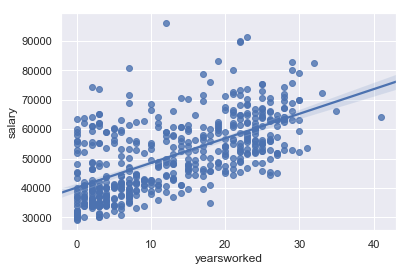

In [17]:
sns.regplot(x='yearsworked', y='salary', data=sala)

A positive relationship. Majority of the plots are below the trend line. Overall the years worked increase with the salary. There a few outliers in the plot. Extremely in above the trendline, not necessarily with a lot of worked years.

In [18]:
stats.pearsonr(sala['salary'], sala['yearsworked'])

(0.6235888657598045, 1.2873351342921916e-56)

With a correlation of 0.6 suggests that relationship between years worked and salary is moderate. The relationship is statistically insignificant, as the value increases the significance drops.